In [4]:
from glob import glob
from math import prod
import torch
from _analysis_functions import load_and_combine_dfs, format_cols
import matplotlib.pyplot as plt

from src.manipulator._style_gan_manipulator._load_stylegan import load_stylegan

### Get Model Parameters

In [2]:
# Get StyleGAN parameters
sgs = glob("/home/oliver/PycharmProjects/NeuralStyle/models/generators/*.pkl")
for sg in sgs:
    model = load_stylegan(sg)
    print(sg.split("/")[-1], sum(prod(p.size()) for p in model.parameters()))

sg2_fmnist.pkl 21787147
sg2_mnist.pkl 21787147
sgXL_cifar10.pkl 17997383
sg2_svhn.pkl 21791251
sg3_mnist.pkl 38034949
sg2_cifar10.pkl 20215315
sgXL_imagenet128.pkl 158741379


In [3]:
# Get Sinvad VAE parameters
vaes = glob("/home/oliver/PycharmProjects/NS_Experiments/benchmarks/SINVAD/vae/models/*.pth")
for vae in vaes:
    model = torch.load(vae)
    params = model.get("model_state_dict", model)
    print(vae.split("/")[-1], sum(prod(p.size()) for p in params.values()))

imagenet.pth 79827076
fMNIST_EnD.pth 4433584
cifar10.pth 83352131
MNIST_EnD.pth 4433584
SVHN_EnD.pth 13678272


## Get Runtime
Runtime was recorded in Wandb for the experiments in the paper. However we added a runtime counter in the scripts for others to validate without wandb.

### Investigate Sinvad Early Termination Condition

In [23]:
# Get Metrics for Sinvad experiments
sinv_iters = []
for e in ["mnist", "fmnist", "svhn", "cifar10", "imagenet"]:
    sin_df = load_and_combine_dfs(path="/home/oliver/NSExperimentation/", filters=["sinvad", e])
    sin_df = format_cols(sin_df, reduce_channels=True)
    sinv_iters.append(sin_df["iter"].tolist())

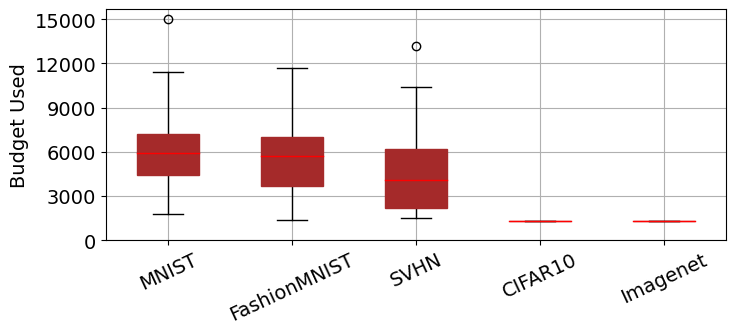

In [30]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8,3))
ax.boxplot(sinv_iters, boxprops=dict(facecolor="brown", color="brown"), **dict(widths=0.495, patch_artist=True, medianprops=dict(color="red")))

ax.set_yticks(range(0,15100, 3000))
ax.set_xticklabels(["MNIST", "FashionMNIST", "SVHN", "CIFAR10", "Imagenet"], rotation=25)
ax.set_ylabel("Budget Used")
ax.grid()
plt.savefig("figures/rq2/sinav_term_iters.pdf", bbox_inches="tight")